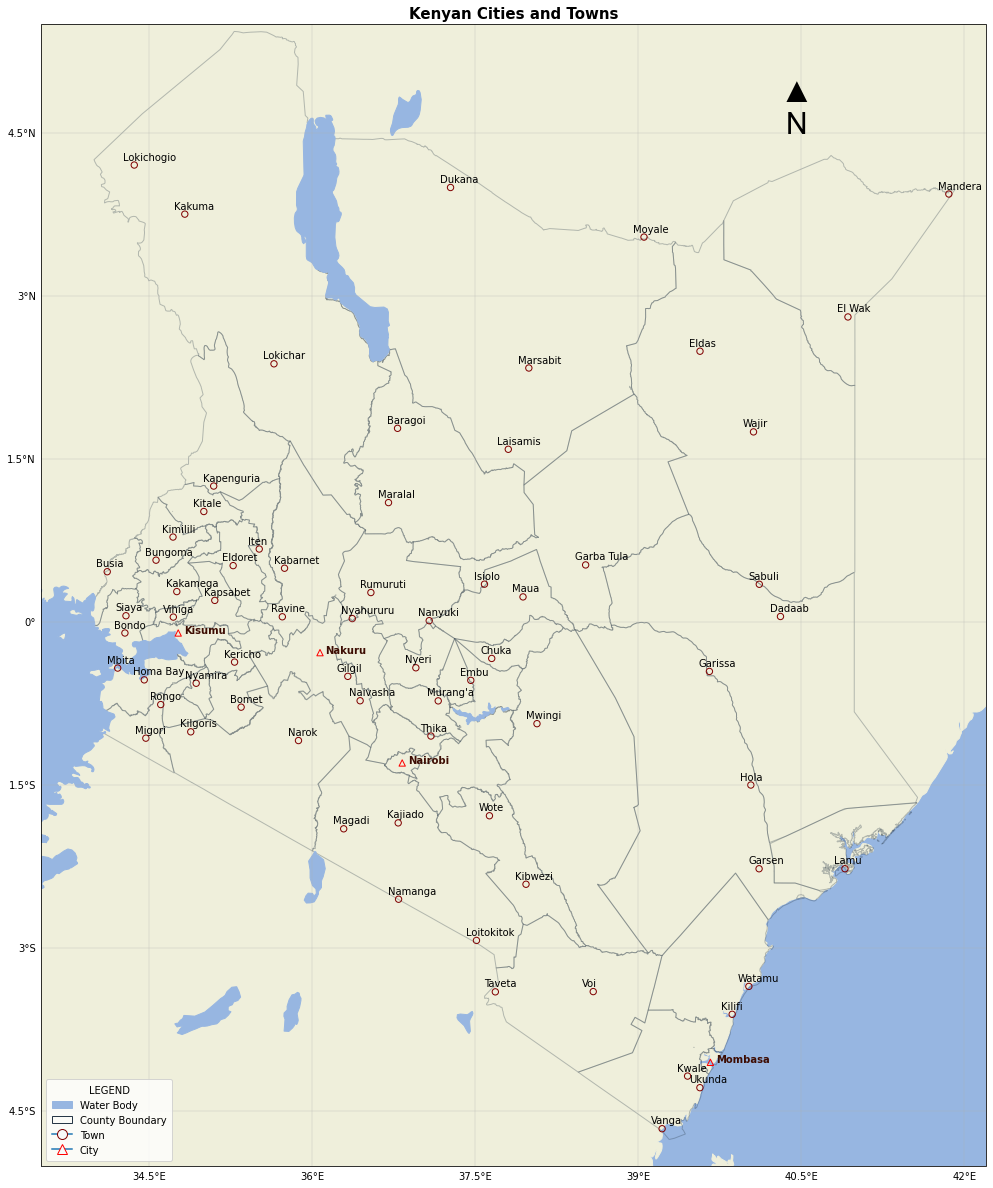

In [192]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import geopandas as gpd


towns=gpd.read_file('Kenya Towns Filtered.shp')
cities=gpd.read_file('Kenya Cities.shp')
counties=gpd.read_file('Counties.shp')

extent=[33.5,42.2,-5,5.5]
crs=ccrs.PlateCarree()
fig,ax=plt.subplots(figsize=(30,21), subplot_kw={'projection':crs})
ax.set_extent(extent,crs=crs)
    
gl=ax.gridlines(crs=crs,draw_labels=True,linewidth=0.3)
gl.right_labels = False
gl.top_labels = False

#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS)


counties.plot(ax=ax,edgecolor='#273746',facecolor='None',alpha=0.3)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
towns.plot(ax=ax,marker='o', color='#800000', markersize=40,facecolor='None')
cities.plot(ax=ax,marker='^', color='red', markersize=40,facecolor='None')



for x, y, label in zip(towns.geometry.x, towns.geometry.y, towns["name"]):
    plt.text(x-0.1, y+0.05, label, fontsize = 10,color='black')

pr={'family':'sans-serif','style':'normal','weight':'bold'}
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities["name"]):
    plt.text(x+0.05, y, label, fontsize = 10, color='#3D0C02', fontproperties = pr)
    
#North Arrow
ax.text(40.5,4.5,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial', rotation = 0)

#LEGEND
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

handles=[]
names=[]

#Area Features
handles.append(mpatches.Patch(color=cfeature.COLORS['water'], label='water'))
handles.append(mpatches.Patch(edgecolor='#273746',facecolor='None', label='county_boundary'))

handles.append(mlines.Line2D([], [],markeredgecolor='#800000', markersize=10,marker='o',
                             markerfacecolor='#F7F9F9',label='town'))
handles.append(mlines.Line2D([], [],markeredgecolor='red', markersize=10,marker='^',
                             markerfacecolor='#F7F9F9',label='cities'))

names.append('Water Body')
names.append('County Boundary')
names.append('Town')
names.append('City')

ax.legend(handles, names,loc='lower left',title='LEGEND',title_fontsize='medium',borderpad=0.6)

plt.title('Kenyan Cities and Towns', fontdict={'fontsize': 15,'fontweight': 'bold'})
plt.show()
